## Problem Statement

This tutorial takes a practical and coding-focused approach. We'll define the terms machine learning and linear regression in the context of a problem, and later generalize their definitions. We'll work through a typical machine learning problem step-by-step:

QUESTION: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, you're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.


**Our objective is to find a way to estimate the value in the "charges" column using the values in the other columns. If we can do so for the historical data, then we should able to estimate charges for new customers too, simply by asking for information like their age, sex, BMI, no. of children, smoking habits and region.**

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [132]:
df = pd.read_csv('insurance.csv')

In [133]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are three categorical columns which we will deal with later. ie **Sex, Smoker and Region**

In [135]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### take of the difference between the 50th percentile and mean of the charges variable

## Exploratory Analysis and Visualization

Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "charges" and other columns.

In [136]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Age
Age is a numeric column. The minimum age in the dataset is 18 and the maximum age is 64. Thus, we can visualize the distribution of age using a histogram with 47 bins (one for each year) and a box plot. We'll use plotly to make the chart interactive, but you can create similar charts using Seaborn.

In [137]:
fig = px.histogram(df, 
                   x='age', 
                   marginal='box',
                   color_discrete_sequence=['purple'],
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

The distribution of ages in the dataset is almost uniform, with 20-30 customers at every age, except for the ages 18 and 19, which seem to have over twice as many customers as other ages. The uniform distribution might arise from the fact that there isn't a big variation in the number of people of any given age (between 18 & 64) in the USA.

**EXERCISE:** Can you explain why there are over twice as many customers with ages 18 and 19, compared to other ages?

### Body Mass Index
Let's look at the distribution of BMI (Body Mass Index) of customers, using a histogram and box plot.

In [138]:
fig = px.histogram(df, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['purple'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

**EXERCISE:** Can you explain why the distribution of ages forms a uniform distribution while the distribution of BMIs forms a gaussian distribution?

### Charges
Let's visualize the distribution of "charges" i.e. the annual medical charges for customers. This is the column we're trying to predict. Let's also use the categorical column "smoker" to distinguish the charges for smokers and non-smokers.

In [139]:
fig = px.histogram(df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['purple', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

We can make the following observations from the above graph:

For most customers, the annual medical charges are under $10,000. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases. The distribution follows a "power law"
There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is $7300, the median for smokers is close to $35,000.

**EXERCISE:** Visualize the distribution of medical charges in connection with other factors like "sex" and "region". What do you observe?

### Sex

In [140]:
fig = px.histogram(df, 
                   x='charges', 
                   marginal='box', 
                   color='sex', 
                   color_discrete_sequence=['purple', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

### Region

In [141]:
fig = px.histogram(df, 
                   x='charges', 
                   marginal='box', 
                   color='region', 
                   color_discrete_sequence=['purple', 'grey','pink','magenta'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

### Smoker
Let's visualize the distribution of the "smoker" column (containing values "yes" and "no") using a histogram.

In [142]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [143]:
px.histogram(df, x='smoker', color='sex', title='Smoker',color_discrete_sequence=['purple','grey'])

### Children

In [144]:
df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [145]:
px.histogram(df, x='children', color='smoker', title='Smoker',color_discrete_sequence=['purple','grey'])

### Region

In [146]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [147]:
px.histogram(df, x='region', color='smoker', title='Smoker',color_discrete_sequence=['purple','grey'])

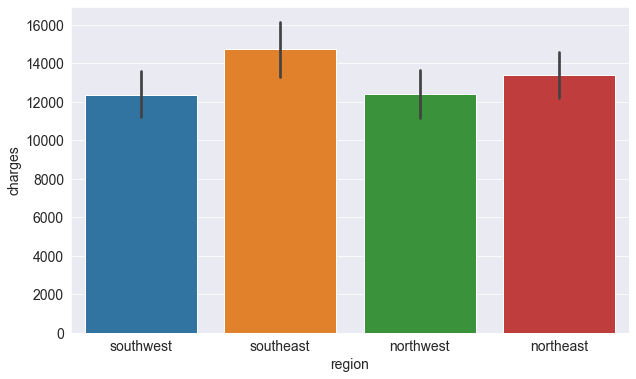

In [148]:
sns.barplot(data=df, x='region', y='charges');

### Age and Charges
Let's visualize the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points.

In [149]:
fig = px.scatter(df, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'],
                 color_discrete_sequence=['red','blue'],
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

We can make the following observations from the above chart:

- The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.

- We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

  1. The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others.
  
  2. The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".
 
  3. The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.

### BMI and Charges
Let's visualize the relationship between BMI (body mass index) and charges using another scatter plot. Once again, we'll use the values from the "smoker" column to color the points.

In [150]:
fig = px.scatter(df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.

What other insights can you gather from the above graph?

EXERCISE: Create some more graphs to visualize how the "charges" column is related to other columns ("children", "sex", "region" and "smoker"). Summarize the insights gathered from these graphs.

Hint: Use violin plots (px.violin) and bar plots (sns.barplot)

In [151]:
# easier to use a violin or barplot because children does not have a continuous value, will be hard to read specific points
px.violin(df, x='children', y='charges', color_discrete_sequence=['purple'])

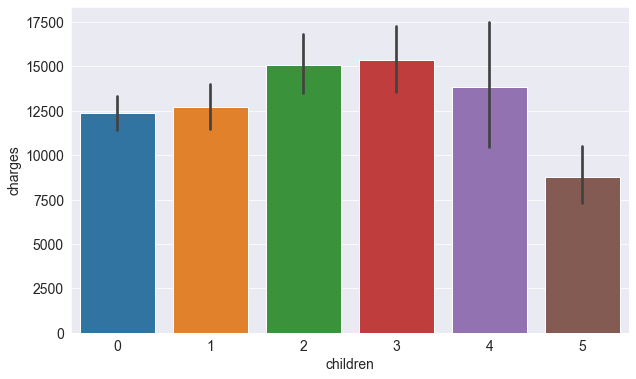

In [152]:
sns.barplot(data=df, x='children', y='charges');

### Correlation
As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

In [153]:
df.charges.corr(df.age)

0.2990081933306477

In [154]:
df.charges.corr(df.bmi)

0.19834096883362887

In [155]:
#To compute the correlation for categorical columns, they must first be converted into numeric columns.
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = df.smoker.map(smoker_values)
df.charges.corr(smoker_numeric)

0.7872514304984771

In [156]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


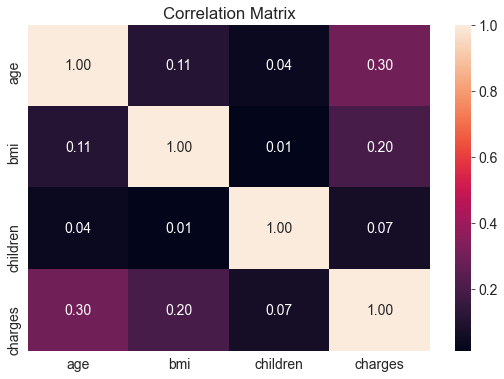

In [157]:
#The result of .corr is called a correlation matrix and is often visualized using a heatmap.
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df.corr(),annot=True,ax=ax, fmt='.2f', color='purple')
plt.title('Correlation Matrix');

### Linear Regression Y= mx + c
where m = slope
x = value of x
c = intercept of y and x


### Dealing with Categorical Features

In [158]:
smoker_codes = {'no': 0, 'yes': 1}
df['smoker_code'] = df.smoker.map(smoker_codes)

In [159]:
sex_codes = {'female': 0, 'male': 1}
df['sex_code'] = df.sex.map(sex_codes)

In [160]:
df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [161]:
df.drop('sex', inplace=True, axis=1)
df

,age,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,27.900,0,yes,southwest,16884.92400,1,0
1,18,33.770,1,no,southeast,1725.55230,0,1
2,28,33.000,3,no,southeast,4449.46200,0,1
3,33,22.705,0,no,northwest,21984.47061,0,1
4,32,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,no,northwest,10600.54830,0,1
1334,18,31.920,0,no,northeast,2205.98080,0,0
1335,18,36.850,0,no,southeast,1629.83350,0,0
1336,21,25.800,0,no,southwest,2007.94500,0,0


In [162]:
df.drop('smoker', inplace=True, axis=1)
df

,age,bmi,children,region,charges,smoker_code,sex_code
0,19,27.900,0,southwest,16884.92400,1,0
1,18,33.770,1,southeast,1725.55230,0,1
2,28,33.000,3,southeast,4449.46200,0,1
3,33,22.705,0,northwest,21984.47061,0,1
4,32,28.880,0,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...
1333,50,30.970,3,northwest,10600.54830,0,1
1334,18,31.920,0,northeast,2205.98080,0,0
1335,18,36.850,0,southeast,1629.83350,0,0
1336,21,25.800,0,southwest,2007.94500,0,0


In [163]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [164]:
one_hot = enc.transform(df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [165]:
df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [166]:
df

,age,bmi,children,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,27.900,0,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,33.770,1,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,33.000,3,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,22.705,0,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,28.880,0,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,31.920,0,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,36.850,0,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,25.800,0,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [167]:
df.drop('region', inplace=True, axis=1)
df

,age,bmi,children,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,31.920,0,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,36.850,0,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,25.800,0,2007.94500,0,0,0.0,0.0,0.0,1.0


In [168]:
df.columns

Index(['age', 'bmi', 'children', 'charges', 'smoker_code', 'sex_code',
       'northeast', 'northwest', 'southeast', 'southwest'],
      dtype='object')

In [169]:
y = df['charges']
X = df[['age', 'bmi', 'children', 'smoker_code', 'sex_code',
       'northeast', 'northwest', 'southeast', 'southwest']]

In [170]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [172]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [173]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [  241.27878731   367.1887526    494.29061749 23463.56486895
    52.13546398   325.94169916   495.76797647  -267.00328737
  -554.70638826]


Text(0, 0.5, 'Predicted Y')

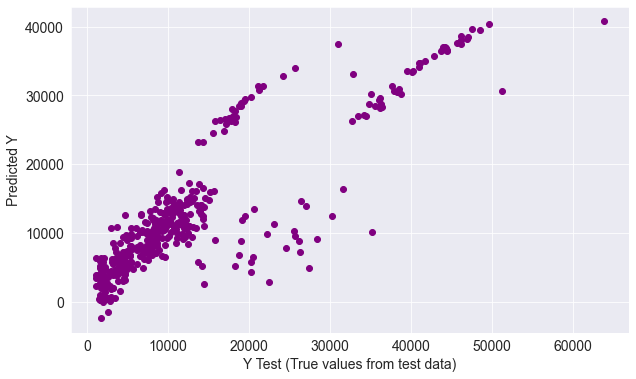

In [174]:
predictions = lm.predict( X_test)

plt.scatter(y_test,predictions, color='purple')
plt.xlabel('Y Test (True values from test data)')
plt.ylabel('Predicted Y')

In [176]:
from sklearn import metrics 
# or use show_scores(pass the model)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3987.962847697632
MSE: 33683659.3246565
RMSE: 5803.762514494929


In [175]:
#numeric columns and their coeffs
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
age,241.278787
bmi,367.188753
children,494.290617
smoker_code,23463.564869
sex_code,52.135464
northeast,325.941699
northwest,495.767976
southeast,-267.003287
southwest,-554.706388


In [179]:
lm.score(X_train, y_train)

0.7453768932202687